In [226]:
#You are hired by NASA as a Data Scientist, Congratulations!
#your first project;  you have to classify stars based on their astornomical measurements,  0 non-pulsar, 1-pulsar
#luckily astronouts gave you a dataset after making observations through our Galaxy
#your job is to use ML techniques as SVM, Decision_tree, Random_forest and Kneighbours
#which ML model gives the best?
#Because you are working in NASA, they have very clean dataset(there is no preprocessing!)
#to learn more about pulsars
#you will find your dataset inside the rar file named as "pulsar_stars.csv"
#  https://www.nasa.gov/mission_pages/GLAST/science/neutron_stars.html

In [227]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

StarsDataset = pd.read_csv('pulsar_stars.csv')
StarsDataset.tail(10)

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_deviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve,target_class
17888,98.726562,50.407823,0.565124,0.245231,0.570234,9.011285,22.018589,561.833787,0
17889,126.625000,55.721826,0.002946,-0.303218,0.534281,8.588882,23.913761,660.197035,0
17890,143.671875,45.302647,-0.045769,0.353643,5.173913,26.462345,5.706651,33.802613,0
17891,118.484375,50.608483,-0.029059,-0.027494,0.422241,8.086684,27.446113,830.638550,0
17892,96.000000,44.193113,0.388674,0.281344,1.871237,15.833746,9.634927,104.821623,0
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


In [228]:
StarsDataset.isnull().sum()

Mean_of_the_integrated_profile                  0
Standard_deviation_of_the_integrated_profile    0
Excess_kurtosis_of_the_integrated_profile       0
Skewness_of_the_integrated_profile              0
Mean_of_the_DM_SNR_curve                        0
Standard_deviation_of_the_DM_SNR_curve          0
 Excess_kurtosis_of_the_DM_SNR_curve            0
 Skewness_of_the_DM_SNR_curve                   0
target_class                                    0
dtype: int64

In [229]:
x_data = StarsDataset.drop('target_class', axis=1)
y = StarsDataset['target_class']

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.2, shuffle = True)
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [250]:
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

In [251]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [252]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
SVC_score = precision_score(y_test,y_pred)

[[15 12]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.83      0.56      0.67        27
           1       0.72      0.91      0.81        34

    accuracy                           0.75        61
   macro avg       0.78      0.73      0.74        61
weighted avg       0.77      0.75      0.74        61



In [253]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
tree_pred = decision_tree.predict(X_test)
print(confusion_matrix(y_test,tree_pred))
print(classification_report(y_test,tree_pred))
DTC_score = precision_score(y_test,tree_pred)

[[19  8]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        27
           1       0.78      0.82      0.80        34

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.77        61
weighted avg       0.77      0.77      0.77        61



In [254]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
RFC_score = precision_score(y_test,rf_pred)

[[20  7]
 [ 2 32]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.82      0.94      0.88        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61



In [255]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier()
KN.fit(X_train,y_train)
KN_pred = KN.predict(X_test)
print(confusion_matrix(y_test,KN_pred))
print(classification_report(y_test,KN_pred))
KN_score = precision_score(y_test,KN_pred)

[[19  8]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.75        27
           1       0.78      0.85      0.82        34

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [256]:
#You are hired by IBM Watson as a Data Scientist, Congratulations!
#Your first project;  you have to classify heart disesae  based on their medical measurements,  0 healthy, 1-heart disease
#your job is to use ML techniques as SVM, Decision_tree, Random_forest and Kneighbours (bonus if you use a Neural Network)
#which ML model gives the best?
#Because you are working in IBM Watson, they have very clean dataset(there is no preprocessing!)
#to learn more about the Heart Disease Dataset :
#  https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [257]:
HeartsDataset = pd.read_csv('HeartDiseaseDataset.csv')
HeartsDataset.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [258]:
HeartsDataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [259]:
x_data = HeartsDataset.drop('target', axis=1)
y = HeartsDataset['target']

In [260]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.2, shuffle = True)
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [261]:
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
38,0.750000,0.0,0.666667,0.575472,0.326484,0.0,0.5,0.587786,0.0,0.129032,1.0,0.00,0.666667
133,0.250000,1.0,0.333333,0.150943,0.248858,0.0,0.5,0.625954,0.0,0.000000,1.0,0.00,0.666667
30,0.250000,0.0,0.333333,0.103774,0.164384,0.0,0.5,0.740458,0.0,0.000000,1.0,0.25,0.666667
111,0.583333,1.0,0.666667,0.528302,0.000000,1.0,0.5,0.778626,0.0,0.032258,1.0,0.25,1.000000
124,0.208333,0.0,0.666667,0.000000,0.166667,0.0,0.5,0.824427,0.0,0.000000,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,0.604167,1.0,0.000000,0.490566,0.210046,0.0,0.5,0.259542,0.0,0.322581,0.5,0.25,1.000000
145,0.854167,1.0,0.333333,0.584906,0.271689,0.0,0.0,0.549618,0.0,0.000000,1.0,0.00,0.666667
173,0.604167,1.0,0.666667,0.358491,0.223744,0.0,0.0,0.778626,0.0,0.516129,1.0,0.50,1.000000
71,0.458333,1.0,0.666667,0.000000,0.230594,0.0,0.5,0.633588,1.0,0.000000,1.0,0.25,1.000000


In [262]:
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
169,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
158,0.604167,1.0,0.333333,0.292453,0.214612,0.0,0.5,0.557252,0.0,0.064516,0.5,1.00,1.000000
135,0.416667,0.0,0.000000,0.339623,0.326484,0.0,0.5,0.702290,0.0,0.000000,1.0,0.00,0.666667
31,0.750000,1.0,0.000000,0.245283,0.116438,0.0,0.5,0.526718,0.0,0.064516,1.0,0.00,1.000000
136,0.645833,0.0,0.666667,0.245283,0.118721,1.0,0.5,0.190840,0.0,0.000000,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.645833,1.0,0.000000,0.433962,0.381279,0.0,0.0,0.755725,0.0,0.193548,0.5,0.50,1.000000
186,0.645833,1.0,0.000000,0.339623,0.289954,0.0,0.5,0.557252,1.0,0.225806,1.0,0.25,1.000000
171,0.395833,1.0,0.333333,0.150943,0.235160,0.0,0.5,0.740458,0.0,0.161290,0.0,0.00,1.000000
141,0.291667,1.0,0.000000,0.198113,0.404110,0.0,0.5,0.839695,0.0,0.193548,0.5,0.00,0.666667


In [263]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
SVC_score_heart = precision_score(y_test,y_pred)

In [264]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[20  8]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



In [265]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
tree_pred = decision_tree.predict(X_test)
DTC_score_heart = precision_score(y_test,tree_pred)
print(confusion_matrix(y_test,tree_pred))
print(classification_report(y_test,tree_pred))

[[21  7]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [266]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
RFC_score_heart = precision_score(y_test,rf_pred)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[21  7]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.91      0.75      0.82        28
           1       0.82      0.94      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61



In [267]:
KN = KNeighborsClassifier()
KN.fit(X_train,y_train)
KN_pred = KN.predict(X_test)
KN_score_heart = precision_score(y_test,KN_pred)
print(confusion_matrix(y_test,KN_pred))
print(classification_report(y_test,KN_pred))

[[21  7]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



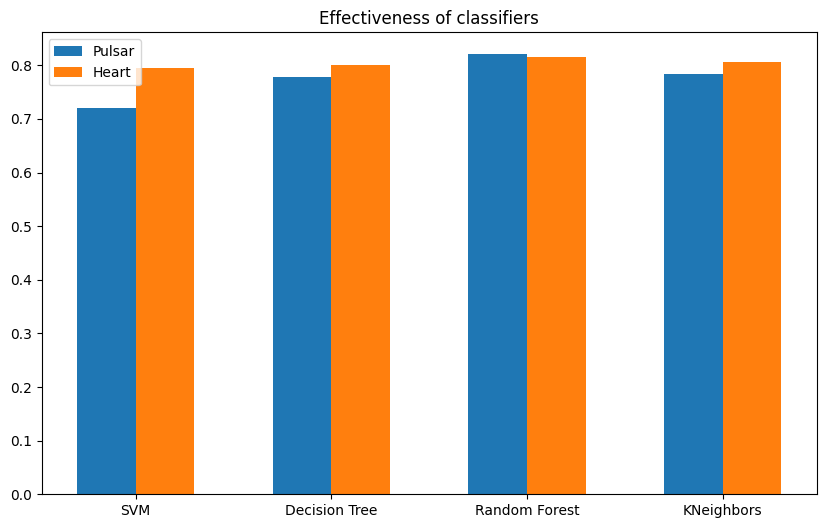

In [270]:
name_classifiers = ["SVM", "Decision Tree", "Random Forest", "KNeighbors"]
pulsar_score = [SVC_score, DTC_score, RFC_score, KN_score]
heart_score = [SVC_score_heart, DTC_score_heart, RFC_score_heart, KN_score_heart]
width = 0.3
x = np.arange(len(name_classifiers))

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, pulsar_score, width, label='Pulsar')
rects2 = ax.bar(x + width/2, heart_score, width, label='Heart')
ax.set_title('Effectiveness of classifiers')
ax.set_xticks(x)
ax.set_xticklabels(name_classifiers)
ax.legend(loc='upper left')

